```
// logic of https://www.youtube.com/watch?v=A6464U4bPPQ
// Facial Recognition attendance system using python

// camera module
camera module take input ...
python check
if (human face in the frame //// or not){
  compare face with the face from database

  if(present){
    // update in csv file
    // name of the student and time of entry of the student

    ///// next kaj hocche entry er pore 30 second er moddhe jodi same face dekhano hoy .. taile bolbe already counted ..

    //// and 30 second pore jodi abar same face count hoy .. taile ek din er  present complete hobe or something !
  }

}else {
  // or not

}
```

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=e2fb0bf0977b86d2c5080e2f2ca3d40944ad97e510a2455285643a26acf0e5a7
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:

!pip install opencv-python
# import opencv-python
# ----------------------------- from yt video www.youtube.com/watch?v=A6464U4bPPQ
import face_recognition as fr
import os
import cv2 # take input from the webcam, process it , give it to face ignition ..
#compare faces

import csv # handle csv file
import numpy as np

from datetime import datetime
#----------------------------- from debajyotikarmaker sir lecture
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tqdm import tqdm


# 1. take input from the webcam - YT Video

In [ ]:
video_capture = cv2.VideoCapture(0); #0 as default web cam

In [ ]:
"""
#image and corresponding encoding ...
#make an array of known face encoding ... came from db
known_face_encoding=[]

#make an array of known face names ... came from db
known_face_names=[]

face_locations = [] # face in webcame .. face co-ordinates
face_encodings = [] # the raw data
face_names = [] # the name of the face it is present in database
s = true
"""

# 2. Load All Image from DB - Sir

In [ ]:
#Data_Path = '/content/drive/MyDrive/CVPR Mohammad Sheakh Image/'
Data_Path = '/content/drive/MyDrive/ImageData'
classes = os.listdir(Data_Path) # return list of folder
print(classes)  # in this case it returns all my image
#----------------------------------------------------------------
train_data = []
for label, classes in enumerate(classes) :
  print(f"label, classes :: {label} , { classes}")
  path = os.path.join(Data_Path, classes)
  print(f"path ::  { path}")

  for singleImage in tqdm(os.listdir(path)):
    print(f"Single Image😀 :: 😀 {singleImage}") #  which will print image name
    # plt.imshow(singleImage) #😭
    img_arr = cv2.imread(os.path.join(path, singleImage)) # numpy array
    # plt.imshow(img_arr) # 😀 eta kaj kore .. image show kore
    img_arr = cv2.resize(img_arr, (128, 128)) # shob gula ke ek size e ante hobe ...
    #train_data.append(img_arr)
    # ----------- we need label also /// numeric value
    train_data.append([img_arr, label]) # image er shathe label o rakhtesi

    #break
 #break
print(f"Length of train_data :: {len(train_data)}") # ------------------ this line is working 😀😀😀😀😀😀



['FAHIM RAHMAN', 'MD ABU ZAYED KHAN', 'MD NAIMUR RAHMAN', 'FAIZA BINTE ZAMAN', 'AHMED IMTIAZ', 'MD MUNTASIR AREFIN NAEEM', 'MD ATIK ULLAH KHAN', 'MD IMTIAJ ALAM SAJIN', 'ESM-E MOULA CHOWDHURY ABHA', 'MD JAHID HASSAN', 'NAHAR ISLAM NISHI', 'MD WAHIDUZZAMAN SUVA', 'MOHAMMAD NUR', 'MOHAMMAD BIN AB JALIL SHEAKH', 'MOHAMMED TANVIR HASSAN', 'MD SAJID ISLAM KHAN', 'REZWAN AHMAD', 'SYEDA HUMAIRA JABEEN', 'NAVID MAHFUZ NAYEEM', 'S M FAISAL']
label, classes :: 0 , FAHIM RAHMAN
path ::  /content/drive/MyDrive/ImageData/FAHIM RAHMAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 IMG_20240223_144918.jpg


 10%|█         | 1/10 [00:00<00:05,  1.68it/s]

Single Image😀 :: 😀 IMG_20240222_174228.jpg


 20%|██        | 2/10 [00:01<00:05,  1.35it/s]

Single Image😀 :: 😀 IMG_20231225_193021.jpg


 30%|███       | 3/10 [00:02<00:06,  1.11it/s]

Single Image😀 :: 😀 IMG_20240224_193659.jpg


 40%|████      | 4/10 [00:03<00:04,  1.27it/s]

Single Image😀 :: 😀 IMG_20240229_113742.jpg


 50%|█████     | 5/10 [00:03<00:03,  1.35it/s]

Single Image😀 :: 😀 IMG_20240227_121450.jpg


 60%|██████    | 6/10 [00:04<00:02,  1.50it/s]

Single Image😀 :: 😀 IMG_20240227_121408.jpg


 70%|███████   | 7/10 [00:05<00:02,  1.36it/s]

Single Image😀 :: 😀 IMG_20240225_103232.jpg


 80%|████████  | 8/10 [00:05<00:01,  1.41it/s]

Single Image😀 :: 😀 IMG_20240131_221809.jpg


 90%|█████████ | 9/10 [00:06<00:00,  1.38it/s]

Single Image😀 :: 😀 IMG_20240204_205230.jpg


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


label, classes :: 1 , MD ABU ZAYED KHAN
path ::  /content/drive/MyDrive/ImageData/MD ABU ZAYED KHAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 a02701b2-a374-42d9-92eb-1cdc8bc2fa0b.jpg


 10%|█         | 1/10 [00:00<00:02,  3.80it/s]

Single Image😀 :: 😀 IMG_9923 (1).PNG


 20%|██        | 2/10 [00:01<00:05,  1.35it/s]

Single Image😀 :: 😀 IMG_0737 (1).JPG


 30%|███       | 3/10 [00:01<00:04,  1.55it/s]

Single Image😀 :: 😀 a02701b2-a374-42d9-92eb-1cdc8bc2fa0b (1).jpg


 40%|████      | 4/10 [00:02<00:02,  2.03it/s]

Single Image😀 :: 😀 IMG_0737.JPG


 50%|█████     | 5/10 [00:02<00:02,  2.19it/s]

Single Image😀 :: 😀 CB46324E-2797-4F05-98F4-2D9F3F75C34F.jpeg


 60%|██████    | 6/10 [00:03<00:03,  1.30it/s]

Single Image😀 :: 😀 IMG_0373.JPG


 70%|███████   | 7/10 [00:04<00:02,  1.44it/s]

Single Image😀 :: 😀 IMG_0373 (1).JPG


 80%|████████  | 8/10 [00:05<00:01,  1.45it/s]

Single Image😀 :: 😀 IMG_9923.PNG


 90%|█████████ | 9/10 [00:05<00:00,  1.39it/s]

Single Image😀 :: 😀 CB46324E-2797-4F05-98F4-2D9F3F75C34F (1).jpeg


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


label, classes :: 2 , MD NAIMUR RAHMAN
path ::  /content/drive/MyDrive/ImageData/MD NAIMUR RAHMAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 IMG-20221226-WA0024.jpg


 10%|█         | 1/10 [00:00<00:04,  1.95it/s]

Single Image😀 :: 😀 IMG_20240229_193158.jpg


 20%|██        | 2/10 [00:01<00:08,  1.02s/it]

Single Image😀 :: 😀 IMG_20240114_233055_601.jpg


 30%|███       | 3/10 [00:02<00:04,  1.47it/s]

Single Image😀 :: 😀 IMG_20240220_075235.jpg


 40%|████      | 4/10 [00:03<00:05,  1.09it/s]

Single Image😀 :: 😀 IMG20221006103105.jpg


 50%|█████     | 5/10 [00:04<00:04,  1.02it/s]

Single Image😀 :: 😀 IMG_20230714_124049.jpg


 60%|██████    | 6/10 [00:05<00:04,  1.04s/it]

Single Image😀 :: 😀 IMG_20240114_233103_379.jpg


 70%|███████   | 7/10 [00:06<00:02,  1.25it/s]

Single Image😀 :: 😀 IMG_20240203_224902.jpg


 80%|████████  | 8/10 [00:06<00:01,  1.19it/s]

Single Image😀 :: 😀 IMG_20240227_184155.jpg


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


Single Image😀 :: 😀 IMG_20240114_233030_631.jpg
label, classes :: 3 , FAIZA BINTE ZAMAN
path ::  /content/drive/MyDrive/ImageData/FAIZA BINTE ZAMAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 7.jpg


 10%|█         | 1/10 [00:00<00:01,  5.97it/s]

Single Image😀 :: 😀 1.jpg


 20%|██        | 2/10 [00:00<00:03,  2.52it/s]

Single Image😀 :: 😀 9.jpg


 30%|███       | 3/10 [00:00<00:02,  3.15it/s]

Single Image😀 :: 😀 8.jpg


 50%|█████     | 5/10 [00:01<00:01,  3.63it/s]

Single Image😀 :: 😀 4.jpg
Single Image😀 :: 😀 5.jpg


 60%|██████    | 6/10 [00:02<00:01,  2.69it/s]

Single Image😀 :: 😀 2.jpg


 70%|███████   | 7/10 [00:02<00:01,  2.74it/s]

Single Image😀 :: 😀 6.jpg


 80%|████████  | 8/10 [00:02<00:00,  3.13it/s]

Single Image😀 :: 😀 3.jpg


 90%|█████████ | 9/10 [00:03<00:00,  2.67it/s]

Single Image😀 :: 😀 10.jpg


100%|██████████| 10/10 [00:03<00:00,  2.90it/s]


label, classes :: 4 , AHMED IMTIAZ
path ::  /content/drive/MyDrive/ImageData/AHMED IMTIAZ


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 20230210_131638.jpg


 10%|█         | 1/10 [00:00<00:03,  2.32it/s]

Single Image😀 :: 😀 20231221_003902.jpg


 20%|██        | 2/10 [00:00<00:02,  3.17it/s]

Single Image😀 :: 😀 20210902_124624-removebg-preview (1).png


 40%|████      | 4/10 [00:01<00:01,  3.66it/s]

Single Image😀 :: 😀 20220308_213811.jpg
Single Image😀 :: 😀 IMG-20221205-WA0001.jpg


 50%|█████     | 5/10 [00:01<00:01,  4.38it/s]

Single Image😀 :: 😀 20220503_140745.jpg


 60%|██████    | 6/10 [00:01<00:00,  4.17it/s]

Single Image😀 :: 😀 Screenshot_20240301_013246_Gallery.jpg


 70%|███████   | 7/10 [00:01<00:00,  3.70it/s]

Single Image😀 :: 😀 20220713_183853.jpg


 80%|████████  | 8/10 [00:02<00:00,  3.32it/s]

Single Image😀 :: 😀 20210925_145847.jpg


100%|██████████| 10/10 [00:02<00:00,  3.47it/s]


Single Image😀 :: 😀 Screenshot_20240301_014252_Facebook.jpg
label, classes :: 5 , MD MUNTASIR AREFIN NAEEM
path ::  /content/drive/MyDrive/ImageData/MD MUNTASIR AREFIN NAEEM


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 287792461_3294601764118574_2685753382961838690_n.jpg


 10%|█         | 1/10 [00:00<00:01,  5.27it/s]

Single Image😀 :: 😀 320056383_619291839883564_7048028013685894693_n.jpg


 20%|██        | 2/10 [00:00<00:02,  3.64it/s]

Single Image😀 :: 😀 316532240_3431892013722881_2077473884973127951_n.jpg


 30%|███       | 3/10 [00:00<00:01,  3.93it/s]

Single Image😀 :: 😀 381568396_3647041298874617_3628283613424837706_n.jpg


 40%|████      | 4/10 [00:01<00:01,  3.74it/s]

Single Image😀 :: 😀 191260090_3011774392401314_1443206442181469142_n.jpg


 50%|█████     | 5/10 [00:01<00:01,  3.13it/s]

Single Image😀 :: 😀 340248401_1271009723794957_7564881402209886361_n.jpg


 60%|██████    | 6/10 [00:01<00:01,  3.28it/s]

Single Image😀 :: 😀 299485514_3342800692632014_4080214702969970904_n.jpg


 70%|███████   | 7/10 [00:02<00:00,  3.40it/s]

Single Image😀 :: 😀 342571102_952218046195260_6337199552230526425_n.jpg


 80%|████████  | 8/10 [00:02<00:00,  2.74it/s]

Single Image😀 :: 😀 329365445_688972973022018_4580179416236588095_n.jpg


 90%|█████████ | 9/10 [00:02<00:00,  2.70it/s]

Single Image😀 :: 😀 365090080_3612249159020498_1400036575724407234_n (1).jpg


100%|██████████| 10/10 [00:03<00:00,  3.01it/s]


label, classes :: 6 , MD ATIK ULLAH KHAN
path ::  /content/drive/MyDrive/ImageData/MD ATIK ULLAH KHAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 IMG_2798.jpg


 10%|█         | 1/10 [00:00<00:03,  2.89it/s]

Single Image😀 :: 😀 IMG_20230525_212237.jpg


 20%|██        | 2/10 [00:00<00:04,  1.91it/s]

Single Image😀 :: 😀 IMG_20230527_122903.jpg


 30%|███       | 3/10 [00:01<00:05,  1.38it/s]

Single Image😀 :: 😀 20230314_210734.jpg


 40%|████      | 4/10 [00:02<00:03,  1.77it/s]

Single Image😀 :: 😀 IMG_0560.jpg


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

Single Image😀 :: 😀 0.jpg


 60%|██████    | 6/10 [00:03<00:01,  2.09it/s]

Single Image😀 :: 😀 IMG_2553.jpg


 70%|███████   | 7/10 [00:03<00:01,  2.16it/s]

Single Image😀 :: 😀 20230912_121310.jpg


 80%|████████  | 8/10 [00:03<00:00,  2.39it/s]

Single Image😀 :: 😀 20231017_160631.jpg


 90%|█████████ | 9/10 [00:04<00:00,  2.64it/s]

Single Image😀 :: 😀 IMG_20231006_132647.jpg


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


label, classes :: 7 , MD IMTIAJ ALAM SAJIN
path ::  /content/drive/MyDrive/ImageData/MD IMTIAJ ALAM SAJIN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 PXL_20231111_115748455.NIGHTk.jpg


 10%|█         | 1/10 [00:00<00:04,  1.99it/s]

Single Image😀 :: 😀 20220331083833_IMG_1004.JPG


 20%|██        | 2/10 [00:00<00:03,  2.38it/s]

Single Image😀 :: 😀 IMG20210316190341.jpg


 30%|███       | 3/10 [00:01<00:02,  3.08it/s]

Single Image😀 :: 😀 op_kop.JPG


 40%|████      | 4/10 [00:01<00:02,  2.57it/s]

Single Image😀 :: 😀 PXL_20231201_145545371.PORTRAIT.jpg


 50%|█████     | 5/10 [00:01<00:01,  2.81it/s]

Single Image😀 :: 😀 PXL_20240203_133743070.PORTlRAIT.jpg


 70%|███████   | 7/10 [00:02<00:00,  3.73it/s]

Single Image😀 :: 😀 PXL_20240126_122806567.jpg
Single Image😀 :: 😀 20221020055447_IMG_8419f - Copy.JPG


 90%|█████████ | 9/10 [00:02<00:00,  3.43it/s]

Single Image😀 :: 😀 PXL_20240203_103720507.jpg
Single Image😀 :: 😀 PXL_20231216_144717661.PORTRAIT.jpg


100%|██████████| 10/10 [00:03<00:00,  2.96it/s]


label, classes :: 8 , ESM-E MOULA CHOWDHURY ABHA
path ::  /content/drive/MyDrive/ImageData/ESM-E MOULA CHOWDHURY ABHA


 10%|█         | 1/10 [00:00<00:01,  7.27it/s]

Single Image😀 :: 😀 IMG-20240223-WA0014.jpg
Single Image😀 :: 😀 IMG-20240223-WA0008.jpg


 30%|███       | 3/10 [00:00<00:01,  6.94it/s]

Single Image😀 :: 😀 IMG-20240223-WA0024.jpg
Single Image😀 :: 😀 IMG-20240223-WA0026.jpg


 50%|█████     | 5/10 [00:00<00:00,  6.56it/s]

Single Image😀 :: 😀 IMG-20240223-WA0023.jpg
Single Image😀 :: 😀 IMG-20240223-WA0029.jpg


 70%|███████   | 7/10 [00:01<00:00,  6.57it/s]

Single Image😀 :: 😀 IMG-20240223-WA0028.jpg
Single Image😀 :: 😀 IMG-20240223-WA0019.jpg


 80%|████████  | 8/10 [00:01<00:00,  6.77it/s]

Single Image😀 :: 😀 IMG-20240223-WA0022.jpg


100%|██████████| 10/10 [00:01<00:00,  6.42it/s]


Single Image😀 :: 😀 IMG-20240223-WA0025.jpg
label, classes :: 9 , MD JAHID HASSAN
path ::  /content/drive/MyDrive/ImageData/MD JAHID HASSAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 Jahid(4).jpg


 10%|█         | 1/10 [00:00<00:01,  5.11it/s]

Single Image😀 :: 😀 Jahid(2).jpg


 20%|██        | 2/10 [00:00<00:01,  5.72it/s]

Single Image😀 :: 😀 Jahid(8).jpg


 30%|███       | 3/10 [00:00<00:01,  5.08it/s]

Single Image😀 :: 😀 Jahid(3).jpg


 50%|█████     | 5/10 [00:00<00:01,  4.96it/s]

Single Image😀 :: 😀 Jahid(7).jpg
Single Image😀 :: 😀 Jahid.jpg


 70%|███████   | 7/10 [00:01<00:00,  5.86it/s]

Single Image😀 :: 😀 Jahid(5).jpg
Single Image😀 :: 😀 Jahid(9).jpg


 90%|█████████ | 9/10 [00:01<00:00,  6.01it/s]

Single Image😀 :: 😀 Jahid(1).jpg
Single Image😀 :: 😀 Jahid(6).jpg


100%|██████████| 10/10 [00:01<00:00,  5.58it/s]


label, classes :: 10 , NAHAR ISLAM NISHI
path ::  /content/drive/MyDrive/ImageData/NAHAR ISLAM NISHI


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 photo_12_2024-03-01_14-05-10.jpg


 20%|██        | 2/10 [00:00<00:01,  5.10it/s]

Single Image😀 :: 😀 photo_3_2024-03-01_16-40-30.jpg
Single Image😀 :: 😀 photo_8_2024-03-01_14-05-10.jpg


 40%|████      | 4/10 [00:00<00:01,  5.21it/s]

Single Image😀 :: 😀 photo_1_2024-03-01_16-40-30.jpg
Single Image😀 :: 😀 photo_14_2024-03-01_14-05-10.jpg


 60%|██████    | 6/10 [00:01<00:00,  5.47it/s]

Single Image😀 :: 😀 photo_11_2024-03-01_14-05-10.jpg
Single Image😀 :: 😀 photo_1_2024-03-01_14-05-10.jpg


 80%|████████  | 8/10 [00:01<00:00,  5.24it/s]

Single Image😀 :: 😀 photo_5_2024-03-01_14-05-10.jpg
Single Image😀 :: 😀 photo_7_2024-03-01_14-05-10.jpg


 90%|█████████ | 9/10 [00:01<00:00,  5.39it/s]

Single Image😀 :: 😀 photo_10_2024-03-01_14-05-10.jpg


100%|██████████| 10/10 [00:01<00:00,  5.18it/s]


label, classes :: 11 , MD WAHIDUZZAMAN SUVA
path ::  /content/drive/MyDrive/ImageData/MD WAHIDUZZAMAN SUVA


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 20210801_115829.jpg


 10%|█         | 1/10 [00:00<00:05,  1.74it/s]

Single Image😀 :: 😀 20210508_131238.jpg


 20%|██        | 2/10 [00:01<00:05,  1.53it/s]

Single Image😀 :: 😀 20210810_130108.jpg


 30%|███       | 3/10 [00:01<00:03,  1.90it/s]

Single Image😀 :: 😀 20210806_165628.jpg


 40%|████      | 4/10 [00:02<00:03,  1.97it/s]

Single Image😀 :: 😀 20210806_170750.jpg


 50%|█████     | 5/10 [00:02<00:02,  2.09it/s]

Single Image😀 :: 😀 20211007_123821.jpg


 60%|██████    | 6/10 [00:02<00:01,  2.22it/s]

Single Image😀 :: 😀 20210616_180711.jpg


 80%|████████  | 8/10 [00:03<00:00,  3.28it/s]

Single Image😀 :: 😀 20210116_103021.jpg
Single Image😀 :: 😀 20210508_131238(1).jpg


 90%|█████████ | 9/10 [00:03<00:00,  2.67it/s]

Single Image😀 :: 😀 20211122_185753.jpg


100%|██████████| 10/10 [00:04<00:00,  2.20it/s]


label, classes :: 12 , MOHAMMAD NUR
path ::  /content/drive/MyDrive/ImageData/MOHAMMAD NUR


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 1705695655412.jpg


 10%|█         | 1/10 [00:00<00:03,  2.54it/s]

Single Image😀 :: 😀 1694425060305.jpg


 30%|███       | 3/10 [00:00<00:01,  3.97it/s]

Single Image😀 :: 😀 1705695655149.jpg
Single Image😀 :: 😀 IMG_0522.jpg


 40%|████      | 4/10 [00:01<00:01,  3.17it/s]

Single Image😀 :: 😀 IMG_20230725_194243.jpg


 50%|█████     | 5/10 [00:01<00:01,  3.52it/s]

Single Image😀 :: 😀 IMG_20231211_085319.jpg


 70%|███████   | 7/10 [00:02<00:00,  3.27it/s]

Single Image😀 :: 😀 IMG_4816.jpg
Single Image😀 :: 😀 IMG_20231122_233310_618-EDIT (1).jpg


 80%|████████  | 8/10 [00:02<00:00,  3.53it/s]

Single Image😀 :: 😀 IMG_20230107_204536.jpg


 90%|█████████ | 9/10 [00:02<00:00,  3.02it/s]

Single Image😀 :: 😀 IMG_20231214_164006.jpg


100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


label, classes :: 13 , MOHAMMAD BIN AB JALIL SHEAKH
path ::  /content/drive/MyDrive/ImageData/MOHAMMAD BIN AB JALIL SHEAKH


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 Mohammad.jpg


 10%|█         | 1/10 [00:00<00:03,  2.63it/s]

Single Image😀 :: 😀 Mohammad(3).jpg


 20%|██        | 2/10 [00:01<00:05,  1.44it/s]

Single Image😀 :: 😀 Mohammad(1).jpg


 40%|████      | 4/10 [00:02<00:03,  1.60it/s]

Single Image😀 :: 😀 Mohammad(5).jpg
Single Image😀 :: 😀 Mohammad(4).jpg


 50%|█████     | 5/10 [00:03<00:04,  1.18it/s]

Single Image😀 :: 😀 Mohammad(8).jpg


 60%|██████    | 6/10 [00:05<00:03,  1.03it/s]

Single Image😀 :: 😀 Mohammad(7).jpg


 80%|████████  | 8/10 [00:05<00:01,  1.79it/s]

Single Image😀 :: 😀 Mohammad(9).jpg
Single Image😀 :: 😀 Mohammad(2).jpg


 90%|█████████ | 9/10 [00:06<00:00,  1.47it/s]

Single Image😀 :: 😀 Mohammad(6).jpg


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


label, classes :: 14 , MOHAMMED TANVIR HASSAN
path ::  /content/drive/MyDrive/ImageData/MOHAMMED TANVIR HASSAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 IMG_20210204.jpg


 10%|█         | 1/10 [00:00<00:05,  1.69it/s]

Single Image😀 :: 😀 IMG_5976.JPG


 20%|██        | 2/10 [00:01<00:04,  1.90it/s]

Single Image😀 :: 😀 IMG_2204.jpg


 30%|███       | 3/10 [00:01<00:03,  1.99it/s]

Single Image😀 :: 😀 IMG_2021.jpg


 40%|████      | 4/10 [00:02<00:03,  1.62it/s]

Single Image😀 :: 😀 IMG_4090.JPG


 50%|█████     | 5/10 [00:02<00:03,  1.62it/s]

Single Image😀 :: 😀 IMG_25847.jpg


 60%|██████    | 6/10 [00:03<00:02,  1.97it/s]

Single Image😀 :: 😀 IMG_2015854.jpg


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

Single Image😀 :: 😀 IMG_7089.JPG


 80%|████████  | 8/10 [00:04<00:01,  1.65it/s]

Single Image😀 :: 😀 IMG_20204.jpg


 90%|█████████ | 9/10 [00:05<00:00,  1.69it/s]

Single Image😀 :: 😀 IMG_9978.JPG


100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


label, classes :: 15 , MD SAJID ISLAM KHAN
path ::  /content/drive/MyDrive/ImageData/MD SAJID ISLAM KHAN


 10%|█         | 1/10 [00:00<00:01,  5.47it/s]

Single Image😀 :: 😀 photo_2024-02-29_18-43-27.jpg
Single Image😀 :: 😀 photo_2024-02-29_18-45-24 (2).jpg


 20%|██        | 2/10 [00:00<00:01,  5.42it/s]

Single Image😀 :: 😀 photo_2024-02-29_18-43-27 (3).jpg


 30%|███       | 3/10 [00:00<00:01,  3.73it/s]

Single Image😀 :: 😀 photo_2024-02-29_18-43-27 (4).jpg


 40%|████      | 4/10 [00:01<00:01,  3.57it/s]

Single Image😀 :: 😀 photo_2024-02-29_18-45-24 (4).jpg


 60%|██████    | 6/10 [00:01<00:01,  3.53it/s]

Single Image😀 :: 😀 photo_2024-02-29_18-43-27 (5).jpg
Single Image😀 :: 😀 photo_2024-02-29_18-43-27 (6).jpg


 80%|████████  | 8/10 [00:02<00:00,  4.19it/s]

Single Image😀 :: 😀 photo_2024-02-29_18-45-24.jpg
Single Image😀 :: 😀 photo_2024-02-29_18-43-27 (2).jpg


100%|██████████| 10/10 [00:02<00:00,  4.15it/s]


Single Image😀 :: 😀 photo_2024-02-29_18-45-24 (3).jpg
label, classes :: 16 , REZWAN AHMAD
path ::  /content/drive/MyDrive/ImageData/REZWAN AHMAD


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 Rezwan(3).jpg


 20%|██        | 2/10 [00:00<00:01,  4.50it/s]

Single Image😀 :: 😀 Rezwan(8).jpg
Single Image😀 :: 😀 Rezwan(7).jpg


 30%|███       | 3/10 [00:00<00:01,  3.88it/s]

Single Image😀 :: 😀 Rezwan(1).jpg


 40%|████      | 4/10 [00:01<00:01,  3.37it/s]

Single Image😀 :: 😀 Rezwan(2).jpg


 50%|█████     | 5/10 [00:01<00:01,  3.32it/s]

Single Image😀 :: 😀 Rezwan(4).jpg


 70%|███████   | 7/10 [00:01<00:00,  3.75it/s]

Single Image😀 :: 😀 Rezwan.jpg
Single Image😀 :: 😀 Rezwan(5).jpg


 80%|████████  | 8/10 [00:02<00:00,  3.44it/s]

Single Image😀 :: 😀 Rezwan(9).jpg


 90%|█████████ | 9/10 [00:02<00:00,  3.48it/s]

Single Image😀 :: 😀 Rezwan(6).jpg


100%|██████████| 10/10 [00:02<00:00,  3.53it/s]


label, classes :: 17 , SYEDA HUMAIRA JABEEN
path ::  /content/drive/MyDrive/ImageData/SYEDA HUMAIRA JABEEN


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 IMG-20230127-WA0045.jpg


 20%|██        | 2/10 [00:00<00:01,  4.18it/s]

Single Image😀 :: 😀 Snapchat-477145335.jpg
Single Image😀 :: 😀 IMG_20240213_091551_458.jpg


 30%|███       | 3/10 [00:00<00:01,  4.18it/s]

Single Image😀 :: 😀 Snapchat-32699592.jpg


 50%|█████     | 5/10 [00:01<00:01,  4.18it/s]

Single Image😀 :: 😀 Snapchat-2032754434.jpg
Single Image😀 :: 😀 IMG-20230425-WA0071.jpg


 70%|███████   | 7/10 [00:01<00:00,  4.71it/s]

Single Image😀 :: 😀 IMG-20230127-WA0045 (1).jpg
Single Image😀 :: 😀 received_998970354415575.jpeg


 80%|████████  | 8/10 [00:02<00:00,  3.69it/s]

Single Image😀 :: 😀 IMG_20240213_091551_458 (1).jpg


 90%|█████████ | 9/10 [00:02<00:00,  3.98it/s]

Single Image😀 :: 😀 Snapchat-1929729646.jpg


100%|██████████| 10/10 [00:02<00:00,  3.85it/s]


label, classes :: 18 , NAVID MAHFUZ NAYEEM
path ::  /content/drive/MyDrive/ImageData/NAVID MAHFUZ NAYEEM


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 20240301_143223.jpg


 10%|█         | 1/10 [00:00<00:05,  1.50it/s]

Single Image😀 :: 😀 20240301_143250.jpg


 20%|██        | 2/10 [00:01<00:05,  1.50it/s]

Single Image😀 :: 😀 20240301_143236.jpg


 30%|███       | 3/10 [00:02<00:06,  1.16it/s]

Single Image😀 :: 😀 20240301_143203.jpg


 40%|████      | 4/10 [00:03<00:05,  1.19it/s]

Single Image😀 :: 😀 20240301_143257.jpg


 50%|█████     | 5/10 [00:04<00:04,  1.18it/s]

Single Image😀 :: 😀 20240301_143359.jpg


 60%|██████    | 6/10 [00:04<00:03,  1.32it/s]

Single Image😀 :: 😀 20240301_143357.jpg


 70%|███████   | 7/10 [00:05<00:02,  1.27it/s]

Single Image😀 :: 😀 20240301_143213.jpg


 80%|████████  | 8/10 [00:06<00:01,  1.24it/s]

Single Image😀 :: 😀 20240301_143346.jpg


 90%|█████████ | 9/10 [00:06<00:00,  1.36it/s]

Single Image😀 :: 😀 20240301_143350.jpg


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


label, classes :: 19 , S M FAISAL
path ::  /content/drive/MyDrive/ImageData/S M FAISAL


  0%|          | 0/10 [00:00<?, ?it/s]

Single Image😀 :: 😀 7.jpg


 10%|█         | 1/10 [00:01<00:11,  1.30s/it]

Single Image😀 :: 😀 10.jpg


 20%|██        | 2/10 [00:02<00:11,  1.38s/it]

Single Image😀 :: 😀 4.jpg


 30%|███       | 3/10 [00:03<00:06,  1.10it/s]

Single Image😀 :: 😀 1.jpg


 40%|████      | 4/10 [00:03<00:04,  1.31it/s]

Single Image😀 :: 😀 6.jpg


 50%|█████     | 5/10 [00:04<00:03,  1.29it/s]

Single Image😀 :: 😀 9.jpg


 60%|██████    | 6/10 [00:05<00:03,  1.16it/s]

Single Image😀 :: 😀 8.jpg


 70%|███████   | 7/10 [00:06<00:02,  1.25it/s]

Single Image😀 :: 😀 3.jpg


 80%|████████  | 8/10 [00:07<00:01,  1.12it/s]

Single Image😀 :: 😀 2.jpg


 90%|█████████ | 9/10 [00:07<00:00,  1.22it/s]

Single Image😀 :: 😀 5.jpg


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]

Length of train_data :: 200


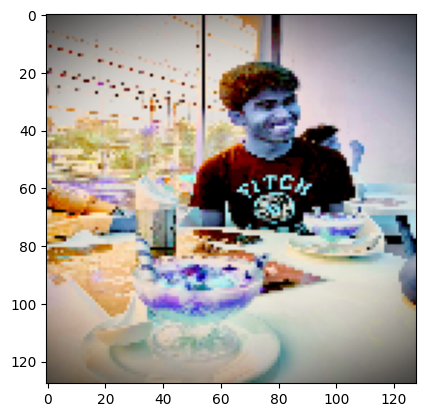

In [ ]:
plt.imshow(train_data[12][0]) # dataset read korar jonno  [0][1]

Text(0.5, 0, 'S')

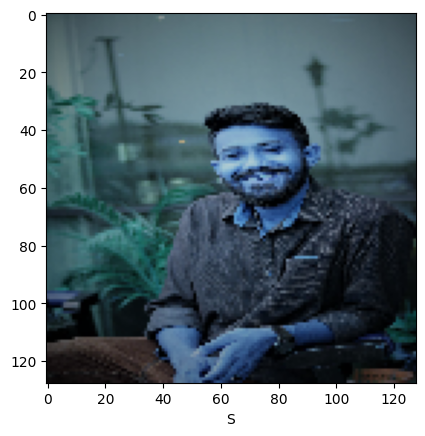

In [ ]:
plt.imshow(train_data[19][0]) #------ 😭 [0 to 19][0] ei porjonto e chobi print hoy .. architecture ta bujhi nai 😭
plt.xlabel(classes[train_data[0][1]]) # --- 😭 label thik moto print hocche na
#--plt.xlabel(train_data[0][1])

In [ ]:
for i in range(39):
  print(train_data[i][1])  # 0 gula mohammad , 1 gula fahim rahman

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3


# Data ke shuffle korte hobe  - Sir

In [ ]:
random.shuffle(train_data)
print(f"print-> train_data after shuffle : {train_data[0][1]}")
#train_data[1][1]

#-------------------- tensor object / numpy array diye feed korte hobe
#--------------------- image ar label alada korbo
train_imgs = []
train_labels = [] # duita empty array niye nilam

for img, label in train_data :
  train_imgs.append(img)
  train_labels.append(label)


#------------------ normal list theke numpy te convert korbo

train_imgs_np = np.array(train_imgs)
train_labels_np = np.array(train_labels)

#-- lets print the dymention
print(f"print-> train_imgs_np.shape , train_labels_np.shape :: {train_imgs_np.shape} , {train_labels_np.shape}")



print-> train_data after shuffle : 18
print-> train_imgs_np.shape , train_labels_np.shape :: (200, 128, 128, 3) , (200,)


# এবার আমরা CNN দেখবো ... মডেল ক্রিয়েট করবো - Sir

In [40]:
# 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉 CURRENTLY WORKING IN THIS PORTION🎉🎉🎉🎉🎉🎉🎉🎉🎉
model = tf.keras.Sequential(
    [
        tf.keras.Input (shape=(128, 128, 3)), # // input bolte hobe .. 3 hocche depth which also means color image Bcz RGB
        # ekhon kichu hidden layer amader ke bolte hobe

        # tf.keras.layers.Conv2D(
        #       filters = 512, # // koto gula filter amra use korbo
        #       kernel_size = (5,5),  # // kernel_size .. filter er dymention
        #       activation = 'sigmoid',
        #       padding = 'same'  # // tensorflow nije calculate korbe .. koto tuku padding dite hobe
        #     ),

        # tf.keras.layers.Conv2D(
        #       filters = 128, # // koto gula filter amra use korbo
        #       kernel_size = (5,5),  # // kernel_size .. filter er dymention
        #       activation = 'relu',
        #       padding = 'same'
        #     ),

        tf.keras.layers.Conv2D(
              filters = 64, # // koto gula filter amra use korbo
              kernel_size = (5,5),  # // kernel_size .. filter er dymention
              activation = 'sigmoid',
              padding = 'same'
            ),

        tf.keras.layers.Conv2D(
              filters = 32, # // koto gula filter amra use korbo
              kernel_size = (3,3),  # // kernel_size .. filter er dymention
              activation = 'sigmoid',

            ),

        # tf.keras.layers.Conv2D(
        #       filters = 16,
        #       kernel_size = (3,3),
        #       activation = 'sigmoid',
        #     ),

      # dymention কে ছোট করতে চাইলে
       tf.keras.layers.MaxPooling2D(pool_size = (2,2)), # --------------- 😭😭😭 issue
      #tf.keras.layers.Dense(unit = 3, activation='softmax'),  # --------------- 😭😭😭 issue

      # নেটওয়ারক এর আউটপুট এর  আগে মেট্রিক্স কে ভেক্টর এ কনভার্ট করতে হবে

      tf.keras.layers.Flatten()

      # কত নাম্বার অফ প্যারামিটার  কমে



    ]
)

model.summary() # // model ta kemon holo dekhte chai

model.compile(
    optimizer = 'adam', #adam,
    loss = 'sparse_categorical_crossentropy', #Categorical Crossentropy   sparse_categorical_crossentropy
    metrics = ['accuracy']
)

# লেটস ট্রেইন দ্যা মডেল
h = model.fit(
    x = train_imgs_np,
    y = train_labels_np,
    epochs = 100,
    validation_split = 0.2, # 20% chobi validation er jonno use korbe ..
    batch_size = 25 # ek bar e 5 ta kore chobi niye kaj korbe
)




Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 128, 128, 64)      4864      
                                                                 
 conv2d_47 (Conv2D)          (None, 126, 126, 32)      18464     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 127008)            0         
                                                                 
Total params: 23328 (91.12 KB)
Trainable params: 23328 (91.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 2s 158ms/step - loss: 11.5419 - 

# Plot Graph Based On Accuracy And Loss

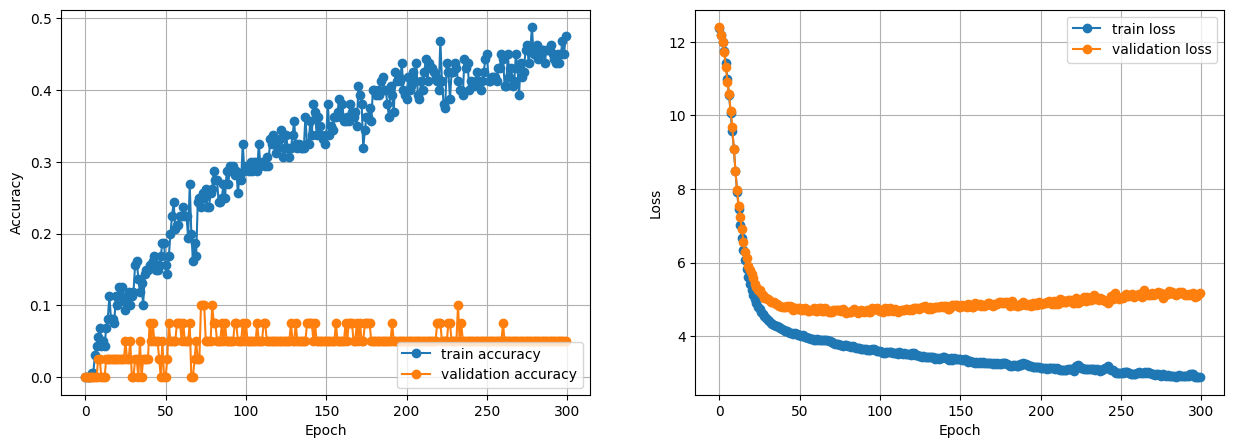

In [ ]:
# .. 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉 CURRENTLY WORKING IN THIS PORTION🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Testing Should be done with Open CV

In [ ]:
# predictions = model.predict(train_data[19][0])
# np.argmax(predictions[0])

# Open a CSV file and create a writer object class - YT Video

In [ ]:
# before that consider date time year
now = datetime.now()
current_date = now.strftime("%Y-%m-%d")

csvFile = open(current_date + '.csv', 'w+', newline = '')
lnwrite = csv.writer(csvFile) # lnwrite is the instance .. we will use this to write the data in CSV file


# 1.1

In [ ]:
while True :  # infinite loop to open camera
  _ , frame = video_capture.read() # extracting the video data // return signal , actual video input
  small_frame = cv2.resize(frame, (0,0), fx = 0.25, fy = 0.25 ) # decreasing the size of video coming from webcam
  rgb_small_frame = small_frame[:, :, ::-1] # converting to RGB as CV2 takes the input as BGR  format
  if True: # which is 's' in YT video
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_grame, face_locations)
    face_names = []
    for face_encoding in face_encodings:
      # here we do the compare stuffs
      break
    break


# Google Colab : Accss Webcam for Images and Video

In [ ]:
from tensorflow import keras

In [ ]:
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

num_classes = 20


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N